In [1]:
import pandas as pd                 #libreria para manejo de datos
import numpy as np                  #libreria para manejo de datos

import matplotlib.pyplot as plt     #libreria para graficos
import seaborn as sns               #libreria para graficos

import statsmodels.api as sm        #libreria para modelos estadisticos
from sklearn.metrics import mean_squared_error  #libreria para metricas de error

import random                 #mean_squared_error(y_true, y_pred) es la media del cuadrado de los errores

In [2]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("./Data/Ventas_portal3.xlsx")

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)

#pd.set_option('display.max_rows', None) # Mostrar todas las filas
pd.set_option('display.max_columns', None) # Mostrar todas las columnas

(22393, 34)


In [21]:
df.head()


,id,date_creation,is_actived,venta,motivo_is_actived,Genero,Edad,city_owner,category,estrato,is_rural,plan,price_plan,user_creation_id,cdo,contract,id_plan,package,plan_type,id_plan_open,zone,nombre_zone,causal_anulacion_id,type_ide,nombre_type_ide,type_service,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
0,33,2022-12-21 19:02:58.730,Orden creada,1,NaN,H,41,Cali,Residencial,4,0,DPL BA 200MB+VOZ ILIM-22,0,64,0,47161108.0,NaN,0,Dupla,0,0,NaN,NaN,2,CC,45,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN
1,36,2022-12-22 14:27:15.660,Orden creada,1,NaN,M,38,Cali,Residencial,3,0,TRPLE TV+TEL ILIM+INT 100MB-22,0,67,0,47161216.0,NaN,0,Triple,0,0,NaN,NaN,2,CC,45,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN
2,38,2022-12-26 14:46:43.920,Orden creada,1,NaN,H,43,Cali,Residencial,3,0,TRPLE TV+TEL ILIM+INT 100MB-22,0,70,0,47162234.0,NaN,0,Triple,0,0,NaN,NaN,2,CC,45,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN
3,40,2023-01-06 20:32:13.890,Rechazado,0,Otra,H,53,Cali,Residencial,3,0,DPL BA 80MB+VOZ ILIM-22,0,77,0,NaN,NaN,0,Dupla,0,0,NaN,NaN,2,CC,45,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN
4,42,2023-01-13 17:11:42.370,Rechazado,0,Otra,H,54,Jamundi,Residencial,4,1,DPL BA 100MB+VOZ ILIM-22,0,55,0,NaN,NaN,0,Dupla,0,0,NaN,NaN,2,CC,45,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN


In [22]:
df.describe(include = "all")

,id,date_creation,is_actived,venta,motivo_is_actived,Genero,Edad,city_owner,category,estrato,is_rural,plan,price_plan,user_creation_id,cdo,contract,id_plan,package,plan_type,id_plan_open,zone,nombre_zone,causal_anulacion_id,type_ide,nombre_type_ide,type_service,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
count,22393.000000,22393,22393,22393.000000,2959,22393,22393.000000,22393,22371,22393.000000,22393.000000,22393,22393.000000,22393.000000,22393,1.931300e+04,22386.000000,22393.000000,22393,22393.000000,22393.000000,22236,329.000000,22393.000000,22393,22393.000000,1613,1613,22393,21816.000000,21816,21816.000000,21816,21816.000000
unique,NaN,NaN,7,NaN,13,2,NaN,5,5,NaN,NaN,20,NaN,NaN,11064,NaN,NaN,NaN,3,NaN,NaN,4,NaN,NaN,6,NaN,4,32,2,NaN,386,NaN,38,NaN
top,NaN,NaN,Orden creada,NaN,Deuda,H,NaN,Cali,Residencial,NaN,NaN,DPL BA 250MB+VOZ ILIM-24,NaN,NaN,0005S2313,NaN,NaN,NaN,Dupla,NaN,NaN,O,NaN,NaN,CC,NaN,Anulacion,Cliente en cartera,NO,NaN,Manuela Beltran,NaN,Comuna 14,NaN
freq,NaN,NaN,19253,NaN,824,14045,NaN,21226,22198,NaN,NaN,4362,NaN,NaN,32,NaN,NaN,NaN,18019,NaN,NaN,6933,NaN,NaN,22275,NaN,641,503,20780,NaN,788,NaN,2579,NaN
mean,11375.507659,2024-06-19 02:37:08.891686912,NaN,0.859778,NaN,NaN,40.244228,NaN,NaN,2.650426,0.000045,NaN,69307.148216,14193.391953,NaN,4.565784e+07,1270.235951,0.025633,NaN,1303.416916,2.548028,NaN,25.328267,2.019247,NaN,45.010807,NaN,NaN,NaN,207.947149,NaN,14.356940,NaN,1.058352
min,33.000000,2022-12-21 19:02:58.730000,NaN,0.000000,NaN,NaN,16.000000,NaN,NaN,1.000000,0.000000,NaN,0.000000,1.000000,NaN,1.491710e+05,1239.000000,0.000000,NaN,0.000000,0.000000,NaN,17.000000,2.000000,NaN,41.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,5757.000000,2024-03-20 15:33:51.670000128,NaN,1.000000,NaN,NaN,34.000000,NaN,NaN,2.000000,0.000000,NaN,61965.000000,8228.000000,NaN,4.681022e+07,1260.000000,0.000000,NaN,1296.000000,1.000000,NaN,25.000000,2.000000,NaN,45.000000,NaN,NaN,NaN,115.000000,NaN,8.000000,NaN,1.000000
50%,11377.000000,2024-06-18 13:50:53.380000,NaN,1.000000,NaN,NaN,40.000000,NaN,NaN,2.000000,0.000000,NaN,66399.000000,14238.000000,NaN,4.681715e+07,1272.000000,0.000000,NaN,1309.000000,3.000000,NaN,25.000000,2.000000,NaN,45.000000,NaN,NaN,NaN,210.000000,NaN,14.000000,NaN,1.000000
75%,16993.000000,2024-09-25 17:27:05.640000,NaN,1.000000,NaN,NaN,46.000000,NaN,NaN,3.000000,0.000000,NaN,70549.000000,20350.000000,NaN,4.682399e+07,1280.000000,0.000000,NaN,1318.000000,4.000000,NaN,26.000000,2.000000,NaN,45.000000,NaN,NaN,NaN,260.000000,NaN,18.000000,NaN,1.000000
max,22627.000000,2025-03-01 15:17:29.170000,NaN,1.000000,NaN,NaN,69.000000,NaN,NaN,6.000000,1.000000,NaN,149999.000000,26748.000000,NaN,4.722259e+07,1282.000000,1.000000,NaN,1320.000000,4.000000,NaN,27.000000,8.000000,NaN,48.000000,NaN,NaN,NaN,867.000000,NaN,46.000000,NaN,4.000000


> Justificacion:

✅ El análisis de los datos históricos de solicitudes, estrato socioeconómico, tipo de plan y ajustes de precio permite identificar patrones de demanda y preferencias por segmento. Mediante técnicas de Ciencia de Datos y modelos predictivos, es posible anticipar qué planes tienen mayor probabilidad de ser contratados por cada estrato. Esta información facilita la personalización de ofertas, la optimización de precios y el diseño de campañas comerciales más efectivas, alineadas con las necesidades reales de los clientes.

> Descripcion:

La organización necesita identificar qué tipos de planes de internet son más demandados en cada estrato socioeconómico de los clientes en Cali. Si bien los planes ofrecidos son los mismos para todos, el valor de cada plan varía según el estrato, lo que puede influir en la decisión de compra. Conocer estas preferencias permitirá ajustar las estrategias comerciales, optimizar las ofertas y definir campañas más efectivas y alineadas con las características y capacidades de pago de cada segmento.

> PREGUNTA SMART

¿Qué tipo de planes de internet (velocidad o categoría) tienen mayor probabilidad de ser contratados en los próximos 3 meses, segmentados por estrato socioeconómico, con base en el histórico de ventas, rechazos y características de clientes en Cali?


* Específica:   Define qué (tipo de planes), dónde (Cali), cómo (segmentado por estrato), y con qué (histórico de ventas, rechazos y características).

* Medible	Se puede medir con frecuencias, tasas de aceptación/rechazo, tendencias históricas y modelos predictivos.

* Accionable	Existen datos históricos disponibles y herramientas analíticas (Python, pandas, scikit-learn) para desarrollar el análisis.

* Realista	Permite tomar decisiones estratégicas: diseñar planes por segmento, ajustar campañas y anticipar demanda.

* Temporal	Define un horizonte de análisis a "los próximos meses", lo que permite actualizaciones periódicas y adaptación al mercado.

In [6]:
df.isnull().values.any()

True

In [55]:
#df.isna().sum()                
null_counts = df.isna().sum()
print("Columnas con datos nulos:\n{}".format(null_counts[null_counts > 0]))            

Columnas con datos nulos:
motivo_is_actived                 19434
category                             22
contract                           3080
id_plan                               7
nombre_zone                         157
causal_anulacion_id               22064
ventas_Retiradas_causales         20780
ventas_Retiradas_nombre_causal    20780
id_barrios                          577
Barrios                             577
id_comuna                           577
Comuna                              577
barrios_id_ciudades                 577
dtype: int64


variable estrato:

- Segmentación socioeconómica: El estrato es un indicador clave en Colombia para conocer el nivel socioeconómico de los hogares. Va de 1 (bajo-bajo) a 6 (alto).

- Poder adquisitivo: Permite identificar qué tipos de planes son más demandados por cada segmento de la población.

- Diseño de ofertas: Las empresas de telecomunicaciones suelen crear planes específicos según estratos, con precios y beneficios adaptados a cada nivel socioeconómico.

- Comportamiento de compra: En estratos bajos, puede haber más interés en planes económicos, mientras que en estratos altos podría haber más preferencia por planes premium.

- Predicción de ventas: Al analizar el comportamiento histórico por estrato, es posible identificar tendencias y predecir la demanda futura.

In [33]:
df.estrato.value_counts()

estrato
2    6611
3    5652
1    4933
4    2701
5    1540
6     956
Name: count, dtype: int64

In [34]:
print(df['estrato'].describe())

count    22393.000000
mean         2.650426
std          1.354329
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: estrato, dtype: float64


In [35]:
print(df['Edad'].describe())

count    22393.000000
mean        40.244228
std          9.237462
min         16.000000
25%         34.000000
50%         40.000000
75%         46.000000
max         69.000000
Name: Edad, dtype: float64


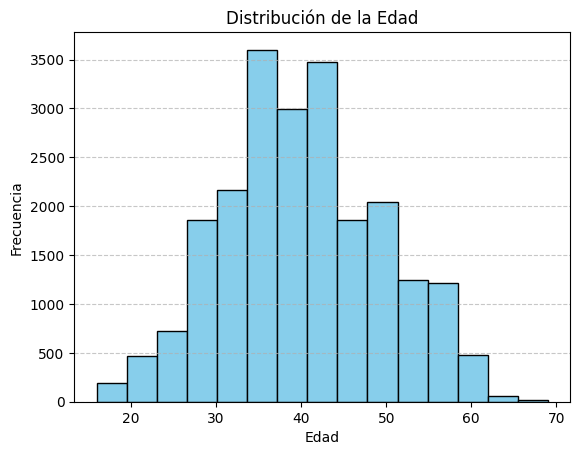

In [36]:
# Valores únicos.
#df_cdo.potencia_media.value_counts()
df['Edad'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')

plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [38]:
df.estrato.value_counts("normalize = True") * 100   #porcentaje

estrato
2    29.522619
3    25.240030
1    22.029206
4    12.061805
5     6.877149
6     4.269191
Name: proportion, dtype: float64

In [39]:
df['estrato'].value_counts().idxmax() # El valor que más se repite

2

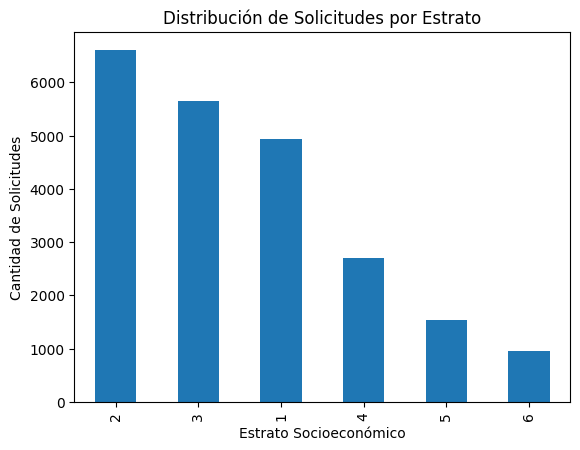

In [42]:
#df.estrato.value_counts().sort_index().plot(kind="bar")
df.estrato.value_counts().plot(kind="bar")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Cantidad de Solicitudes")
plt.title("Distribución de Solicitudes por Estrato")
plt.show()

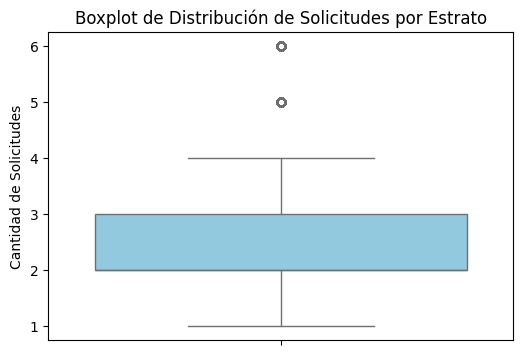

In [123]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['estrato'], color='skyblue')

plt.title('Boxplot de Distribución de Solicitudes por Estrato')
plt.ylabel("Cantidad de Solicitudes")

plt.show()

En este caso, los estratos 5 y 6 (outliers) aparecen como puntos fuera de la caja, lo que indica que son menos comunes.

In [29]:
df_ordenes_creadas = df[df['is_actived'] == 'Orden creada']
df_ordenes_creadas.shape

(19253, 31)

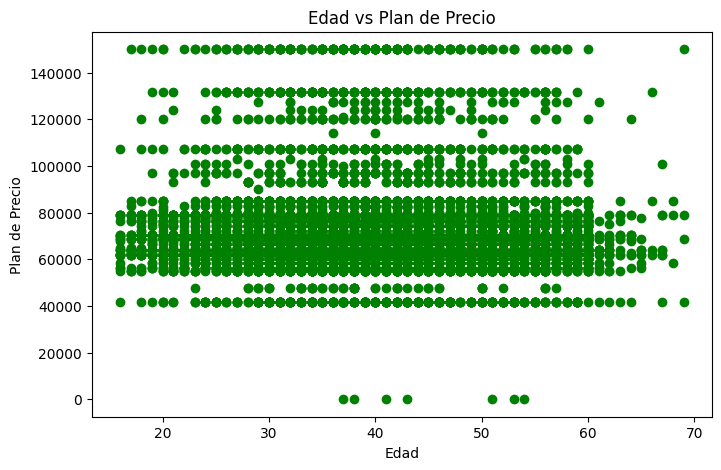

In [49]:

x=df["Edad"]
y=df["price_plan"]

plt.figure(figsize=(8, 5))  #crea la figura antes de graficar
plt.scatter(x, y, color='green')  #grafico de dispersion

plt.title('Edad vs Plan de Precio')
plt.xlabel('Edad') 
plt.ylabel('Plan de Precio')
#plt.tight_layout()
plt.show()

(22393, 34)


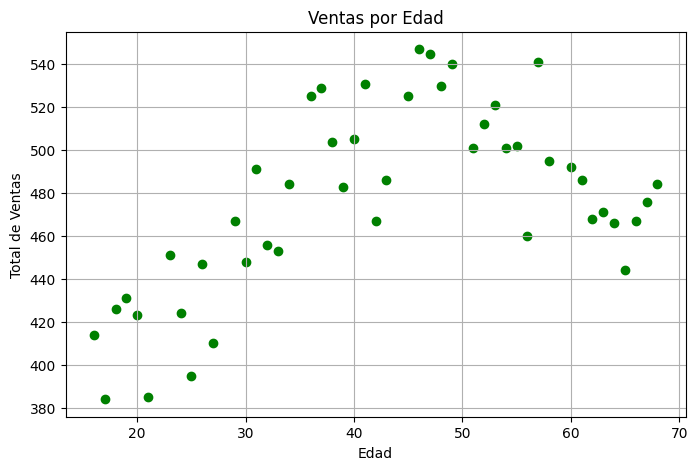

In [99]:
# Cargar el archivo Excel
df = pd.read_excel("./Data/Ventas_portal3.xlsx")

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)

#pd.set_option('display.max_rows', None) # Mostrar todas las filas
pd.set_option('display.max_columns', None) # Mostrar todas las columnas

ventas_por_estrato = df.groupby('Edad')['venta'].sum().reset_index()

plt.figure(figsize=(8, 5))

x = ventas_por_estrato['Edad']
y = ventas_por_estrato['venta']

plt.scatter(x, y, color='green')

plt.title('Ventas por Edad')
plt.xlabel('Edad')
plt.ylabel('Total de Ventas')

plt.grid(True)
plt.show()

(22393, 34)


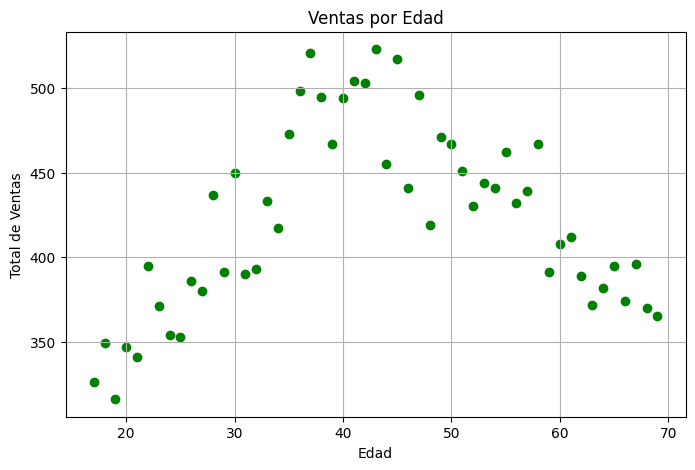

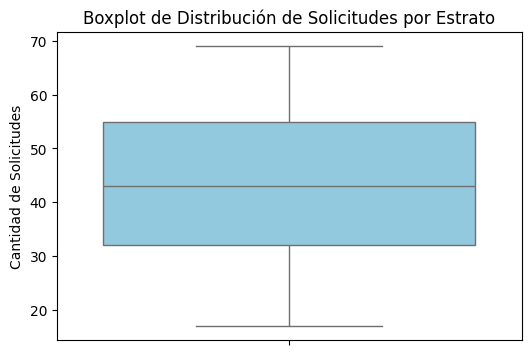

In [146]:
# Cargar el archivo Excel
df = pd.read_excel("./Data/Ventas_portal3.xlsx")

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)

#pd.set_option('display.max_rows', None) # Mostrar todas las filas
pd.set_option('display.max_columns', None) # Mostrar todas las columnas

ventas_por_estrato = df.groupby('Edad')['venta'].sum().reset_index()

plt.figure(figsize=(8, 5))

x = ventas_por_estrato['Edad']
y = ventas_por_estrato['venta']

plt.scatter(x, y, color='green')

plt.title('Ventas por Edad')
plt.xlabel('Edad')
plt.ylabel('Total de Ventas')

plt.grid(True)
plt.show()

#df.Edad.value_counts()
#df.Edad.value_counts().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Edad'], color='skyblue')

plt.title('Boxplot de Distribución de Solicitudes por Estrato')
plt.ylabel("Cantidad de Solicitudes")

plt.show()

In [52]:
df.isna().sum().sum()

89209

In [53]:
missing_data = df.isnull()
missing_data.head(5)

,id,date_creation,is_actived,venta,motivo_is_actived,Genero,Edad,city_owner,category,estrato,is_rural,plan,price_plan,user_creation_id,cdo,contract,id_plan,package,plan_type,id_plan_open,zone,nombre_zone,causal_anulacion_id,type_ide,nombre_type_ide,type_service,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,True,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,True,False,True,True,True,True,True


In [66]:
import pandas as pd
import numpy as np

# Cargar el archivo original
file_path = './Data/genero_edad2.xlsx'
df = pd.read_excel(file_path)

# Revisamos las primeras filas para confirmar la estructura
df.head()


,Genero,Edad
0,H,41
1,M,38
2,H,43
3,H,53
4,H,54


In [64]:
# Definir función para generar edades con distribución ajustada
def generar_edad_ajustada():
    probas = [
        (16, 20, 0.05),   # 5% entre 16 y 20 años
        (21, 30, 0.10),   # 25% entre 21 y 30 años
        (31, 40, 0.28),   # 45% entre 31 y 50 años
        (41, 50, 0.25),   # 45% entre 31 y 50 años
        (51, 65, 0.22),   # 20% entre 51 y 65 años
        (66, 69, 0.10)    # 5% entre 66 y 75 años
    ]

    rango_edades = []
    probabilidades = []

    for inicio, fin, prob in probas:
        edades = list(range(inicio, fin + 1))
        rango_edades.extend(edades)
        probabilidades.extend([prob / len(edades)] * len(edades))

    return np.random.choice(rango_edades, p=probabilidades)

# Aplicar la función para generar edades ajustadas
np.random.seed(42)  # Semilla para reproducibilidad
df['Edad_Ajustada'] = [generar_edad_ajustada() for _ in range(len(df))]

# Guardar el nuevo archivo con las edades ajustadas
output_path = './Data/genero_edad2_ajustado.xlsx'
df.to_excel(output_path, index=False)

# Mostrar las primeras filas para ver el resultado
df.head()


,Genero,Edad,Edad_Ajustada
0,H,41,39
1,M,38,68
2,H,43,54
3,H,53,47
4,H,54,31


In [133]:
import pandas as pd
import numpy as np


# Generar edades aleatorias entre 16 y 22 años
edades0 = np.random.randint(17, 19, 335)
edades1 = np.random.randint(19, 22, 783)
edades2 = np.random.randint(22, 28, 2127)
edades3 = np.random.randint(28, 35, 3023)
edades4 = np.random.randint(35, 44, 4590)
edades5 = np.random.randint(44, 50, 2687)
edades6 = np.random.randint(50, 59, 4590)
edades7 = np.random.randint(59, 67, 3587)
edades8 = np.random.randint(67, 70, 671)

# Crear un DataFrame largo, uniendo todas las edades en una sola columna
edades = np.concatenate([edades6, edades4, edades7, edades2, edades5, edades1, edades3, edades0, edades8])

# Crear DataFrame
df = pd.DataFrame({'edad': edades})

# Opcional: si quieres saber a qué grupo pertenece cada edad, puedes agregar una columna 'grupo'
grupos = (['Grupo6'] * len(edades6) +
          ['Grupo4'] * len(edades4) +
          ['Grupo7'] * len(edades7) +
          ['Grupo2'] * len(edades2) +
          ['Grupo5'] * len(edades5) +
          ['Grupo1'] * len(edades1) +
          ['Grupo3'] * len(edades3) +
          ['Grupo0'] * len(edades0) +
          ['Grupo8'] * len(edades8))

df['grupo'] = grupos

# Mezclar filas de forma aleatoria sin alterar contenido
df = df.sample(frac=1).reset_index(drop=True)

# Mostrar primeras filas para validar
print(df.head())

# Guardar el resultado
df.to_excel('./Data/edades_todas_en_una_columna.xlsx', index=False)

print("Archivo 'edades_todas_en_una_columna.xlsx' generado con éxito.")

   edad   grupo
0    62  Grupo7
1    60  Grupo7
2    34  Grupo3
3    45  Grupo5
4    49  Grupo5
Archivo 'edades_todas_en_una_columna.xlsx' generado con éxito.


In [145]:
import pandas as pd
import numpy as np


# Generar edades aleatorias entre 16 y 22 años
edades1 = np.random.randint(17, 22, 1679)
edades2 = np.random.randint(22, 28, 2239)
edades3 = np.random.randint(28, 35, 2911)
edades4 = np.random.randint(35, 44, 4478)
edades5 = np.random.randint(44, 50, 2799)
edades6 = np.random.randint(50, 59, 4033)
edades7 = np.random.randint(59, 70, 4254)

# Crear un DataFrame largo, uniendo todas las edades en una sola columna
edades = np.concatenate([edades6, edades4, edades7, edades2, edades5, edades1, edades3])

# Crear DataFrame
df = pd.DataFrame({'edad': edades})

# Opcional: si quieres saber a qué grupo pertenece cada edad, puedes agregar una columna 'grupo'
grupos = (['Grupo6'] * len(edades6) +
          ['Grupo4'] * len(edades4) +
          ['Grupo7'] * len(edades7) +
          ['Grupo2'] * len(edades2) +
          ['Grupo5'] * len(edades5) +
          ['Grupo1'] * len(edades1) +
          ['Grupo3'] * len(edades3))

df['grupo'] = grupos

# Mezclar filas de forma aleatoria sin alterar contenido
df = df.sample(frac=1).reset_index(drop=True)

# Mostrar primeras filas para validar
print(df.head())

# Guardar el resultado
df.to_excel('./Data/edades_todas_en_una_columna.xlsx', index=False)

print("Archivo 'edades_todas_en_una_columna.xlsx' generado con éxito.")

   edad   grupo
0    56  Grupo6
1    54  Grupo6
2    41  Grupo4
3    20  Grupo1
4    17  Grupo1
Archivo 'edades_todas_en_una_columna.xlsx' generado con éxito.
